## **Logistic Regression**


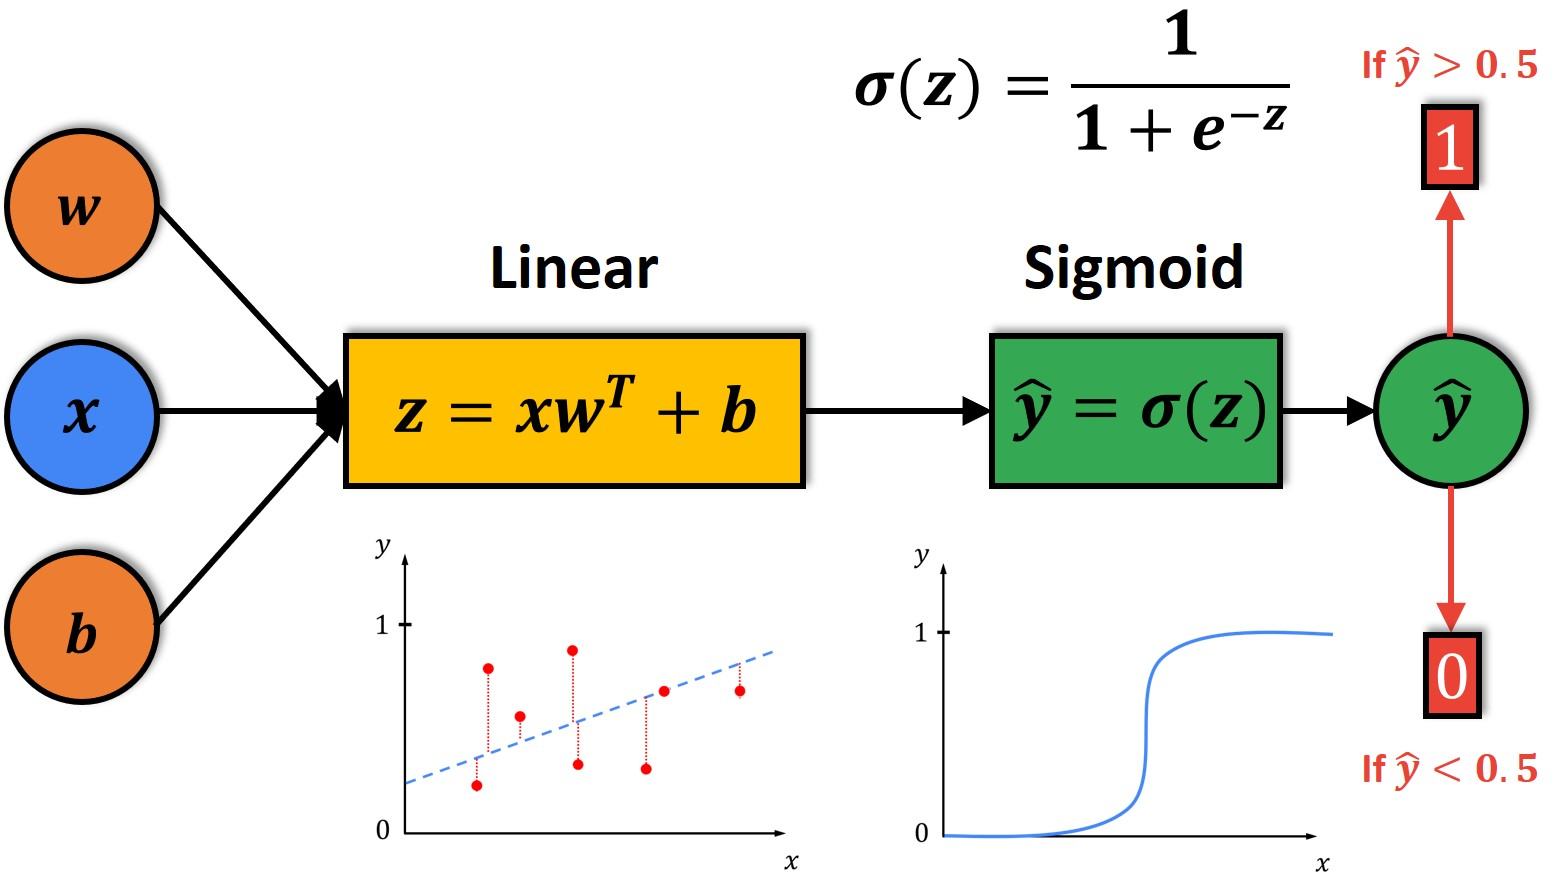

### **Logistic regression** is a supervised machine learning algorithm mainly used for binary classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not.

### In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function which outputs a value between 0 and 1 which denotes the probability of an instance belonging to class 1.

### **How does Logistic Regression work?**

The logistic regression model transforms the linear regression function continuous value output into categorical value output using a sigmoid function, which maps any real-valued set of independent variables input into a value between 0 and 1 . This function is known as the logistic function.

Let the independent input features be
$$
X=\left[\begin{array}{ccc}
x_{11} & \ldots & x_{1 m} \\
x_{21} & \ldots & x_{2 m} \\
\vdots & \ddots & \vdots \\
x_{n 1} & \ldots & x_{n m}
\end{array}\right]
$$
and the dependent variable is $\mathrm{Y}$ having only binary value i.e. 0 or 1.
$$
Y= \begin{cases}0 & \text { if Class } 1 \\ 1 & \text { if Class } 2\end{cases}
$$
then apply the multi-linear function to the input variables $\mathrm{X}$
$$
z=\left(\sum_{i=1}^n w_i x_i\right)+b
$$

Here $x_i$ is the ith observation of $\mathrm{X}, w_i=\left[w_1, w_2, w_3, \cdots, w_m\right]$ is the weights or Coefficient, and $\mathbf{b}$ is the bias term also known as intercept. simply this can be represented as the dot product of weight and bias.
$$
z=w \cdot X+b
$$

### **Sigmoid Function**

Now we use the sigmoid function where the input will be $\mathrm{z}$ and we find the probability between 0 and 1 . i.e predicted $\mathrm{y}$.
$$
\sigma(z)=\frac{1}{1-e^{-z}}
$$

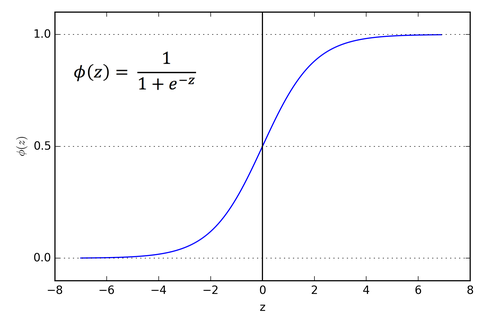

As shown above, the figure sigmoid function converts the continuous variable data into the probability i.e. between 0 and 1.
$$
\sigma(z)\to 1\ as\ z \to \infty
$$
$$
\sigma(z)\to 0\ as\ z \to -\infty
$$

- is always bounded between 0 and 1
where the probability of being a class can be measured as:
$$
\begin{array}{r}
P(y=1)=\sigma(z) \\
P(y=0)=1-\sigma(z)
\end{array}
$$

### **Logistic Regression Equation**

The odd is the ratio of something occurring to something not occurring. it is different from probability as the probability is the ratio of something occurring to everything that could possibly occur. so odd will be
$$
\frac{p(x)}{1-p(x)}=e^z
$$

Applying natural log on odd. then log odd will be
$$
\begin{gathered}
\log \left[\frac{p(x)}{1-p(x)}\right]=z \\
\log \left[\frac{p(x)}{1-p(x)}\right]=w \cdot X+b
\end{gathered}
$$
then the final logistic regression equation will be:
$$
\hat{y}\ =  \ P(y = 1)=\frac{e^{w \cdot X+b}}{1+e^{w \cdot X+b}}=\frac{1}{1+e^{-w \cdot X+b}}
$$

### **Likelihood function for Logistic Regression**

The predicted probabilities will $p(X ; b, w)=p(x)$ for $y=1$ and for $y=0$ predicted probabilities will $1-p(X ; b, w)=1-p(x)$
$$
L(b, w)=\prod_{i=1}^n p\left(x_i\right)^{y_i}\left(1-p\left(x_i\right)\right)^{1-y_i}
$$

Taking natural logs on both sides
$$
l(b, w)=\log (L(b, w))=\sum_{i=1}^n y_i \log p\left(x_i\right)+\left(1-y_i\right) \log \left(1-p\left(x_i\right)\right)
$$

For loss function, we can just take negative log-likelihood i.e.
$$
Log\ Loss = \ -\sum_{i=1}^n y_i \log p\left(x_i\right)+\left(1-y_i\right) \log \left(1-p\left(x_i\right)\right)
$$

#### **So, the finally update step becomes:**
\begin{aligned}
w_j=w_j-\alpha\frac{1}{n}\sum_{i=1}^n\left(\hat{y}-y\right)x^{(i)}_j
\end{aligned}

\begin{aligned}
w_0=w_0-\alpha\frac{1}{n}\sum_{i=1}^n\left(\hat{y}-y\right)
\end{aligned}

$where$

$$
\hat{y}\ = \ \sigma(z) = \ \frac{1}{1+e^{-w \cdot X+b}}
$$


In [375]:
class LogisticRegression:

  def __init__(self, fit_intercept = True, learning_rate = 0.001, max_iter = 10000, class_weight = 'balanced'):
    self.fit_intercept = fit_intercept
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    if class_weight != 'balanced' and not isinstance(class_weight, dict):
      print(type(class_weight))
      raise Exception('The argument for "class_weight" should be either "balanced" or in the form {class_label: weight}')
    self.class_weight = class_weight


  def fit(self, X, y):
    import numpy as np
    import pandas as pd

    classes = set(y)
    if self.class_weight == 'balanced':
      class_weight = {class_ : 1 for class_ in classes}
    else:
      classes_in_class_weight = (self.class_weight).keys()
      if classes != classes_in_class_weight:
        raise Exception('Classes in target variable are not matching with those in the argument "class_weight"')
      else:
        class_weight = self.class_weight

    def sigmoid(z):
      return 1/(1 + np.e ** (-z))

    def assign_class_weight(label, class_weight_dict):
      return class_weight_dict[label]

    sigmoid = np.vectorize(sigmoid)
    assign_class_weight = np.vectorize(assign_class_weight)

    err_weight_array = assign_class_weight(y, class_weight)


    n, d = X.shape
    w = np.random.rand(d)
    if self.fit_intercept:
      w = np.append(w, 1)
      ones = np.ones(shape = (n, 1))
      X = np.hstack((X, ones))

    for i in range(self.max_iter):
      y_pred = sigmoid(np.dot(X, w))
      err = (y_pred - y) * err_weight_array
      gradient = 2 * np.dot(X.T, err)
      w -=  self.learning_rate * gradient

    if self.fit_intercept:
      self.coef_ = w[:-1]
      self.intercept_ = w[-1]
    else:
      self.coef_ = w
      self.intercept_ = 0


  def predict_proba(self, X):
    import numpy as np
    import pandas as pd

    def sigmoid(z):
      return 1/(1 + np.e ** (-z))

    if 'coef_' not in dir(self):
      raise Exception('The model has been fit on the data yet')

    sigmoid = np.vectorize(sigmoid)
    pos_class_proba = sigmoid(np.dot(X, self.coef_) + self.intercept_).reshape(-1, 1)
    neg_class_proba = 1 - pos_class_proba
    proba = np.hstack((neg_class_proba, pos_class_proba))
    return proba


  def predict(self, X):
    import numpy as np
    import pandas as pd

    if 'coef_' not in dir(self):
      raise Exception('The model has been fit on the data yet')

    probas = self.predict_proba(X)
    return np.argmax(probas, axis = 1)


  def fit_predict(self, X):
    import numpy as np
    import pandas as pd
    self.fit(X)
    return self.predict(X)


  def score(self, X, y):
    import numpy as np
    import pandas as pd
    if 'coef_' not in dir(self):
      raise Exception('The model has been fit on the data yet')
    n = len(y)
    y_pred = self.predict(X)
    acc = np.sum(y_pred == y) / n
    return acc